In [48]:
import pandas as pd
import networkx as nx
import datetime
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('fourCollections.csv', dtype={'collection_slug': 'str', 'asset_id': 'int', 'asset_name': 'str', 'owner_username': 'str', 'owner_address': 'str', 'event_type': 'str'})

In [50]:
# Clean Data
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('collection_slug', axis=1,inplace=True)
df.drop('asset_contract_date', axis=1, inplace=True)
pd.to_datetime(df['event_timestamp']).dt.strftime('%m/%d/%Y %H:%M')
df.drop_duplicates(keep='first')
df = df[df['event_type'] == 'successful']
df.head()


,collection_name,asset_id,asset_name,owner_username,owner_address,event_timestamp,event_type
142798,Azuki,206855934,Azuki #9442,Fandoghi,0x489795dc70252cf420177f6ca9a3feb2195a34dd,2022-06-17T10:04:20,successful
142799,Azuki,204242783,Azuki #1567,NaN,0x4328b6537112fc8cc216251712d6b0d7f191bee9,2022-06-17T08:55:39,successful
142800,Azuki,204242812,Azuki #1610,NONAME789,0x2791b3fe4690799fa519eeb0cb7319c7a90da828,2022-06-17T04:43:22,successful
142801,Azuki,204258025,Azuki #5902,NaN,0x709c43d68e4045823edf3f59bf31c4fa307cef2f,2022-06-17T04:09:09,successful
142802,Azuki,204246264,Azuki #1983,NaN,0x4bbc35c3cb2a5a65c7427012a9b1277d93751c32,2022-06-17T02:58:18,successful


In [51]:
# Sorts addresses with more than 1 asset
a = df[df['owner_address'].isin(df['owner_address'].value_counts()[df['owner_address'].value_counts() > 1].index)].owner_address.unique()

df_a = pd.DataFrame()

i = 0
for owner in a:
    temp = df[df['owner_address'] == a[i]]

    df_a = df_a.append(temp)

    i += 1


In [52]:
# Sort Data
df_b = df_a[(df_a['event_timestamp'] > '2021-12-20T10:00') & (df_a['event_timestamp'] < '2021-12-21T12:00')]

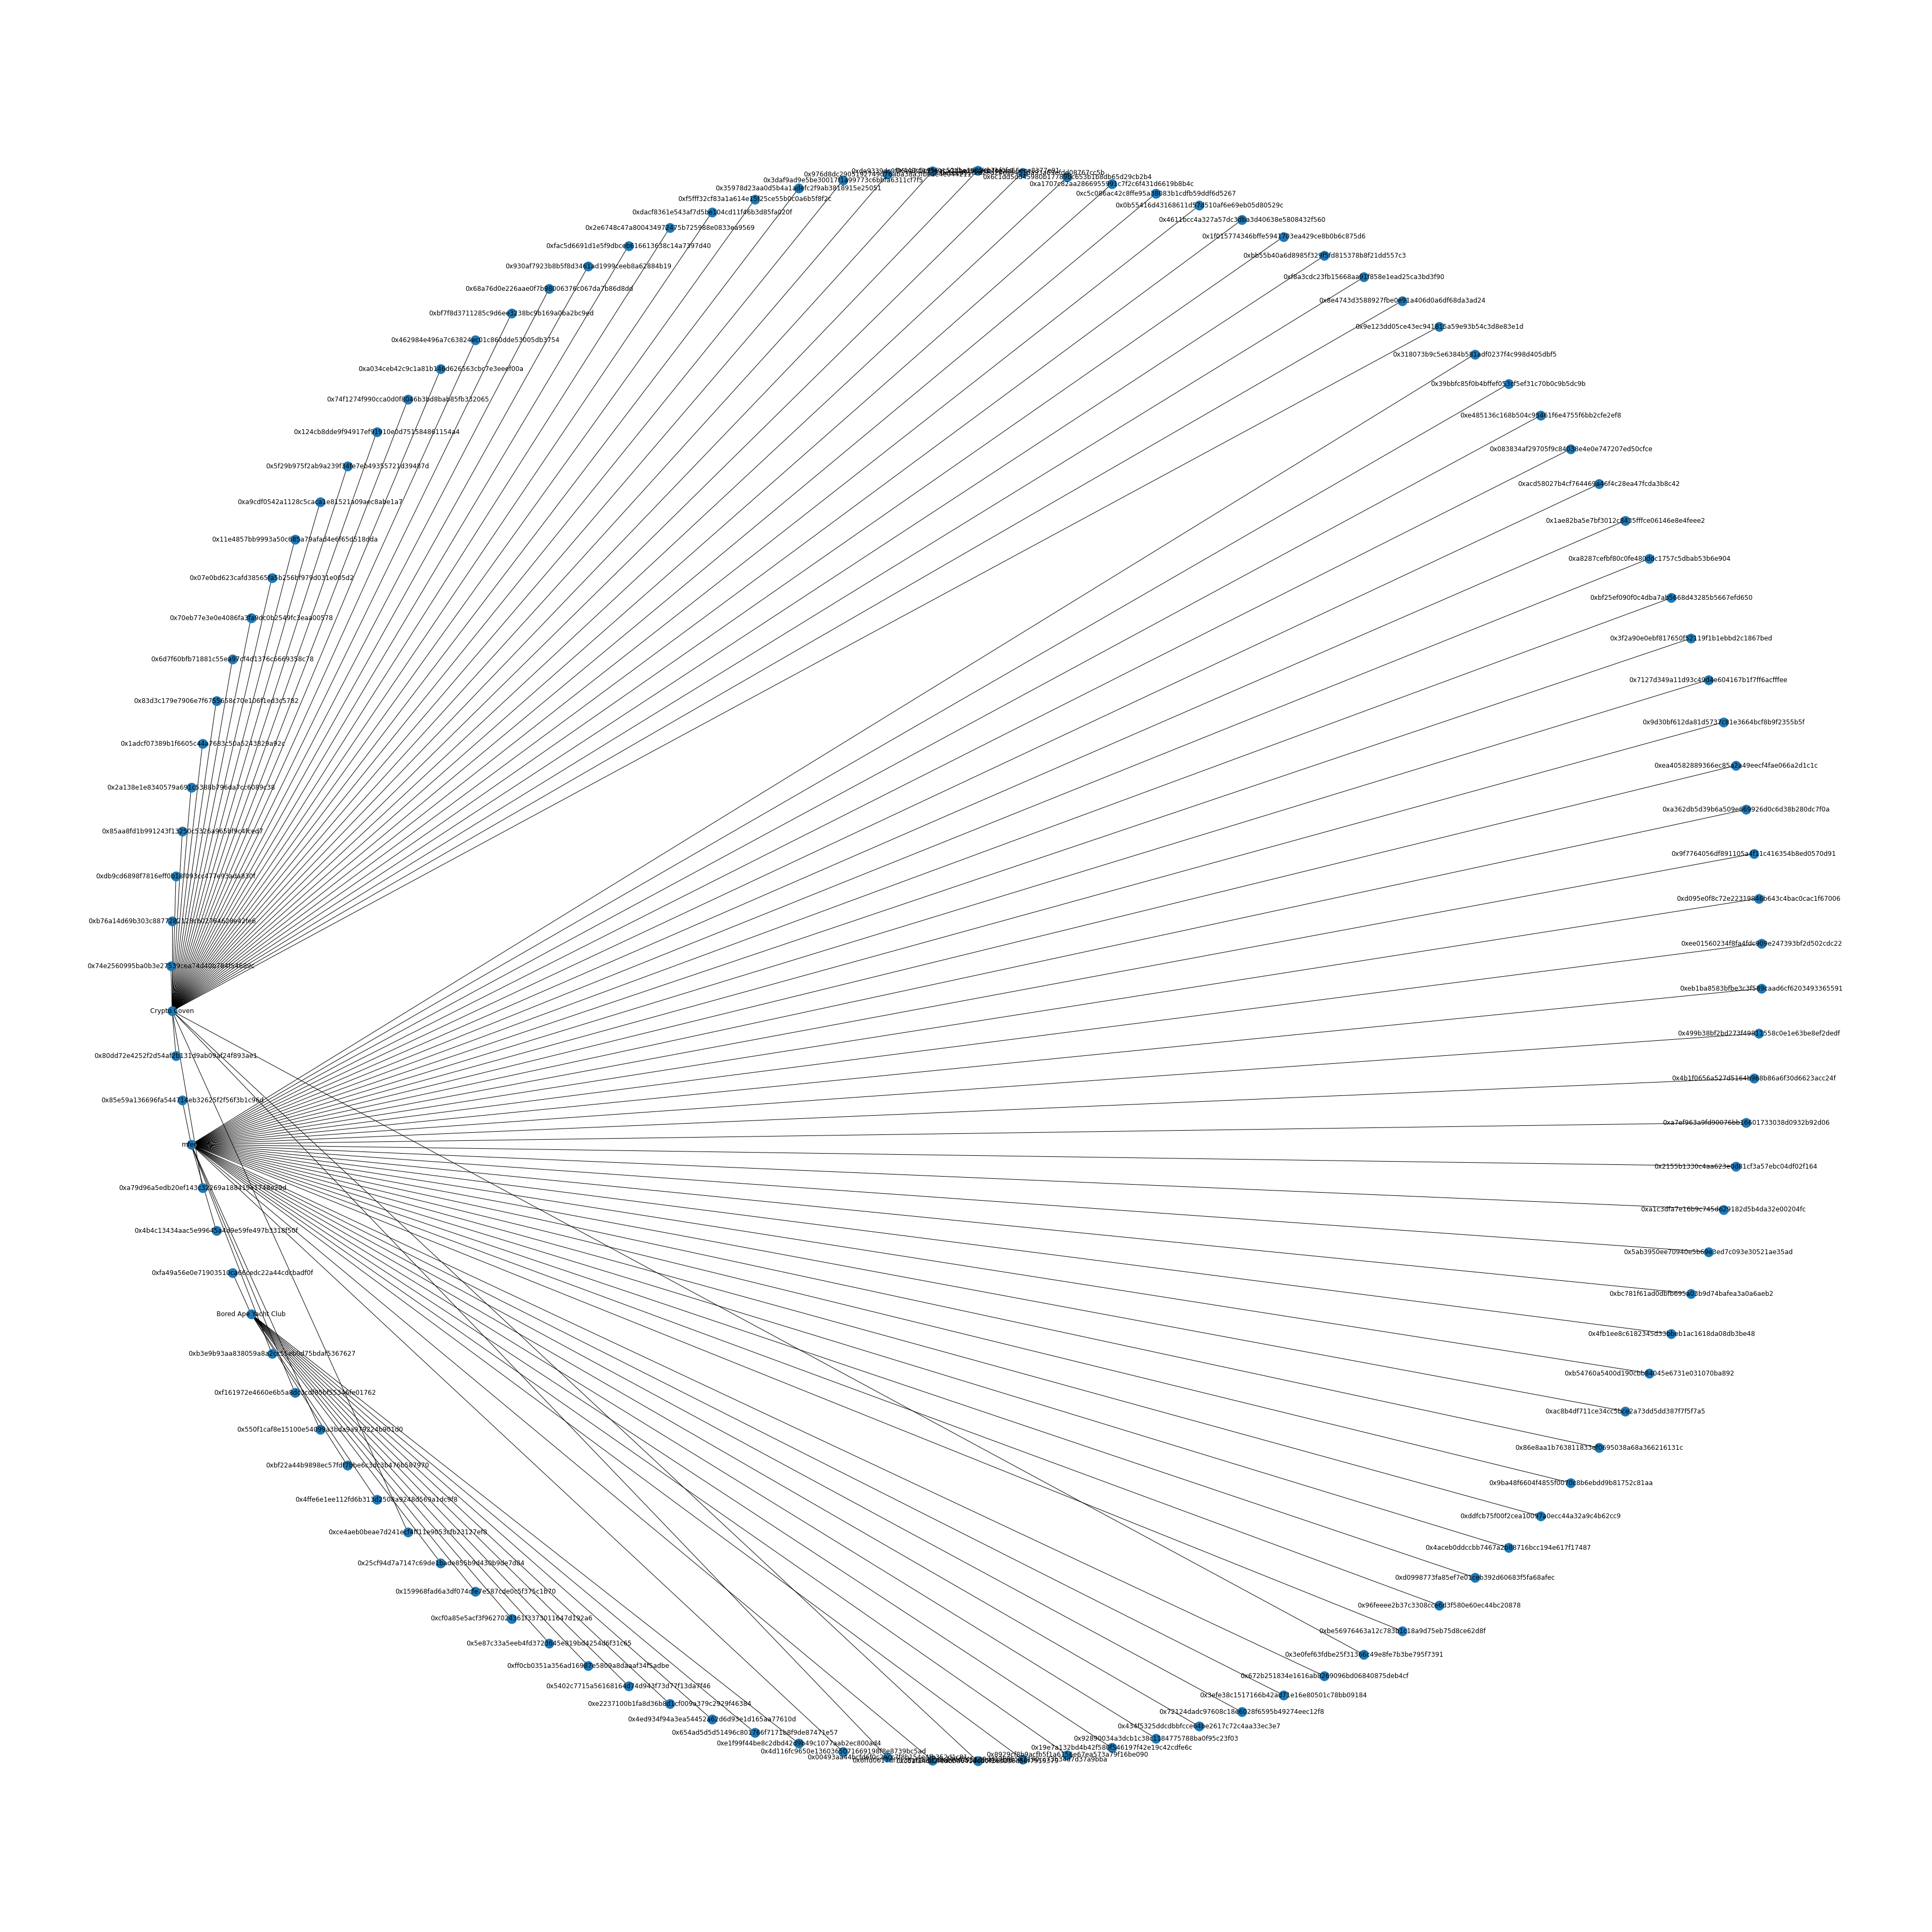

In [53]:
plt.figure(figsize=(50, 50))
G = nx.from_pandas_edgelist(df_b, 'owner_address', 'collection_name')

nx.draw_shell(G, with_labels=True)

In [54]:
#g = nx.from_pandas_edgelist(df_a, source='asset_name', target='owner_address')
#nx.draw(g)

In [55]:
collections = list(df_a.collection_name.unique())
collections

['Azuki', 'mfers', 'Bored Ape Yacht Club', 'Crypto Coven']